*Linear Regression from medical insurance charges*

In [1]:
medical_charges_url ="https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"  # dataset source

In [2]:
from urllib.request import urlretrieve


In [3]:
urlretrieve(medical_charges_url, "medical_charges.csv")

('medical_charges.csv', <http.client.HTTPMessage at 0x7f3f60f2ae90>)

**Create pandas dataframe from the downloaded dataset**

In [4]:
!pip install pandas --quiet

In [5]:
import pandas as pd

In [6]:
medical_df = pd.read_csv('medical_charges.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- **The dataset contains both categorical and continuous data.**  
- There are **no null values** in the dataset. It appears to be **already cleaned**.


In [8]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The ranges of values seems in the numerical 
column seems to make sense(no negative). 
The "charges" column appear to be greatly 
skewed, as the median(50 percentile) is much 
lower than the maximum value.

In [9]:
!pip install plotly matplotlib seaborn --quiet

In [10]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# show inline. prevents pop-ups
%matplotlib inline   

In [11]:
#improve style for matplotlib and seaborn charts
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Age**

Age is a numeric column. The minimum is 18 and the maximum is 64. 

In [12]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [13]:
!pip install nbformat --upgrade --quiet


In [17]:
fig = px.histogram(medical_df,
                   x = "age",
                   marginal = 'box',
                   nbins = 47,
                   title = "Age Distribution")
fig.update_layout(bargap=0.1)
fig.show()

The distribution is almost uniform with 20-30 counts of customers at every age from age 20-64. Ages 18 and 19 seem to have twice as much counts of customers as the other. Uniform distribution maybe as a result that there isn't great variation in ages from 18-64. The reason for the huge counts of customers may possibly due to the fact that there was some kind of promotion for those ages.

**BMI: Body Mass Index**

In [22]:
fig = px.histogram(medical_df,
                    x = 'bmi',
                    marginal='box',
                    title="BMI Distribution",
                    color_discrete_sequence=['red']
                    )
fig.update_layout(bargap=0.1)
fig.show()

The measurement of the bmi seem to for a **Gaussian distribution** centered around the value 30, with a few outliers towards the right. This distribution may possibly be as a result of the weight of the normal body. <18.5 are considered underweight, 18.5-24.9 are normal weight, 25-29.9 are considered obesity and the links. This might be the reason the shape of the distribution, and I believe age has perhaps a direct on influence on the bmi

**Charges**
- Use the categorical column "smoker" to distinguish the charges for smokers and non-smokers.

In [25]:
fig = px.histogram(medical_df,
                    x='charges',
                    marginal='box',
                    color_discrete_sequence=['green','grey'],
                    title='Annual Medical Charges',
                    color='smoker'
                    )

fig.update_layout(bargap=0.1)
fig.show()

**Observations**
- There is a significant difference in the charges b/n smokers and non-smokers. While the median for non-smokers is around $7300, the meidan for smokers is around $34,400.
- There few non-smokers with high cost on medical charges with may be due to illness, accidents, and other factors.

In [27]:
px.histogram(medical_df,x='smoker', color='sex', title="Smoker", marginal='box')

In [28]:
fig = px.scatter(medical_df,
                    x='age',
                    y='charges',
                    color="smoker",
                    hover_data=['sex','children'],
                    title="Age vs Charges")
fig.update_traces(marker_size=5)
fig.show()

- There general trend seems to be medical charges increases with age. Howeverm there is a significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.<br>


- There are three clusters which seem to form a line with an increasing slope:
    1. "Healthy non-smokers" with relatively low medical expenses compares to other.
    2. Mix of smokers and non-smokers. This overlap may be due to non-smokers with major medical issues and smokers without major medical issues.
    3. Smokers, presumably with major medical issues that are possibly related to or worsened by smoking.

In [29]:
fig = px.scatter(medical_df,
                    x='bmi',
                    y='charges',
                    color="smoker",
                    hover_data=['sex','children'],
                    title="BMI vs Charges")
fig.update_traces(marker_size=5)
fig.show()

It appears that for non-smokers, an increase in BMI doesn't seem to relate to an increase in medical charges. However medical charges seem to be significantly higher for smokers with BMI greater than 30.

In [30]:
px.scatter(medical_df,x='children', y='charges', title="Children vs Charges")

In [31]:
px.violin(medical_df,x='children', y='charges', title="Children vs Charges")

**Correlation**

In [32]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306476)

In [33]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362884)

In [34]:
medical_df.charges.corr(medical_df.children)

np.float64(0.06799822684790487)

In [35]:
smoker_value = {'no': 0, 'yes' : 1}
smoker_numeric = medical_df.smoker.map(smoker_value)
medical_df.charges.corr(smoker_numeric)

np.float64(0.7872514304984767)

In [40]:
medical_df.select_dtypes(include='number').corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


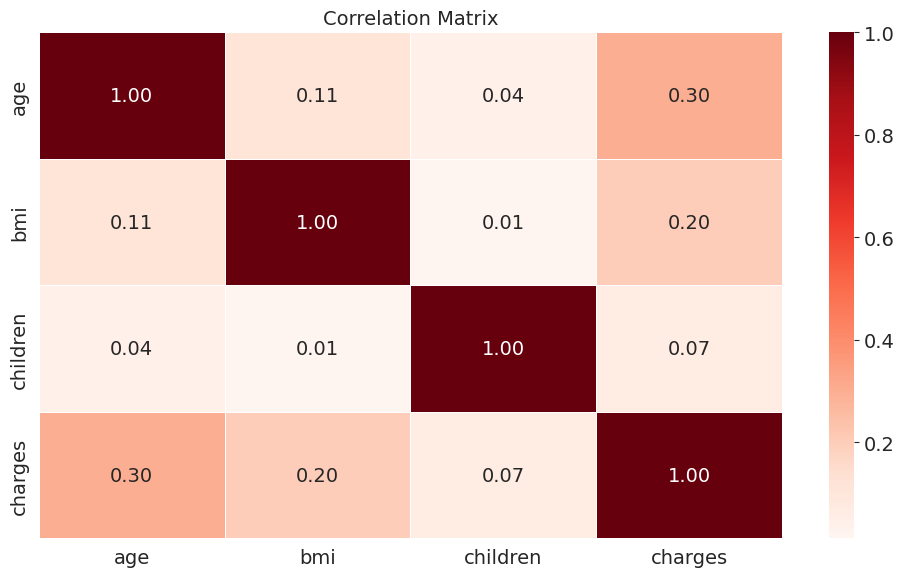

In [43]:
corr_matrix = medical_df.select_dtypes(include='number').corr()
plt.figure(figsize=(10, 6))

# Plot heatmap
sns.heatmap(corr_matrix, cmap='Reds', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=14)
plt.tight_layout()
plt.show()